<h1>Analysis of Azog a1 chip</h1>
Online analysis script used to pre-analyse the data collected during the cooldown of the chip.

In [1]:
sample_name = 'azog_a1'                    # name of the chip in the fridge
db_name = '20211014_ncr_resonator_dc.db'   # name of the database
user = 'ncr'                               # who is performing measurements

<h3>Basic imports</h3>

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from resonator_tools import circuit

import qcodes as qc
from qcodes import initialise_database, load_by_run_spec
from qcodes.dataset.plotting import plot_by_id

db_path  = os.path.join(r'D:\QMET' + '\\' + sample_name + '\\', db_name)

<h2>Data loading</h2>

In [3]:
RUN_ID = 26
qc.initialise_or_create_database_at(db_path)
dataset = qc.load_by_run_spec(experiment_name='vna_s21_trace', captured_run_id=RUN_ID)
print(dataset)

f = dataset.get_parameter_data('ZNB20_S21_S21_frequency')['ZNB20_S21_S21_frequency']['ZNB20_S21_S21_frequency'][0:1001]
mag = dataset.get_parameter_data('ZNB20_S21_magnitude')['ZNB20_S21_magnitude']['ZNB20_S21_magnitude']
phi = dataset.get_parameter_data('ZNB20_S21_phase')['ZNB20_S21_phase']['ZNB20_S21_phase']
#plt.plot(f, phi)

resonance_4.8 #26@D:\QMET\azog_a1\20211014_ncr_resonator_dc.db
--------------------------------------------------------------
ZNB20_S21_S21_frequency - numeric
ZNB20_S21_magnitude - numeric
ZNB20_S21_phase - numeric


<h2>Data analysis and plotting</h2>

,Qi_dia_corr,Qi_no_corr,absQc,Qc_dia_corr,Ql,fr,theta0,phi0,phi0_err,Ql_err,absQc_err,fr_err,chi_square,Qi_no_corr_err,Qi_dia_corr_err
0,8.16e+03,8.16e+03,6.42e+04,6.44e+04,7.24e+03,4.82e+09,-3.08e+00,6.47e-02,1.83e-02,1.34e+02,8.55e+02,7.22e+03,2.24e-04,1.62e+02,1.62e+02


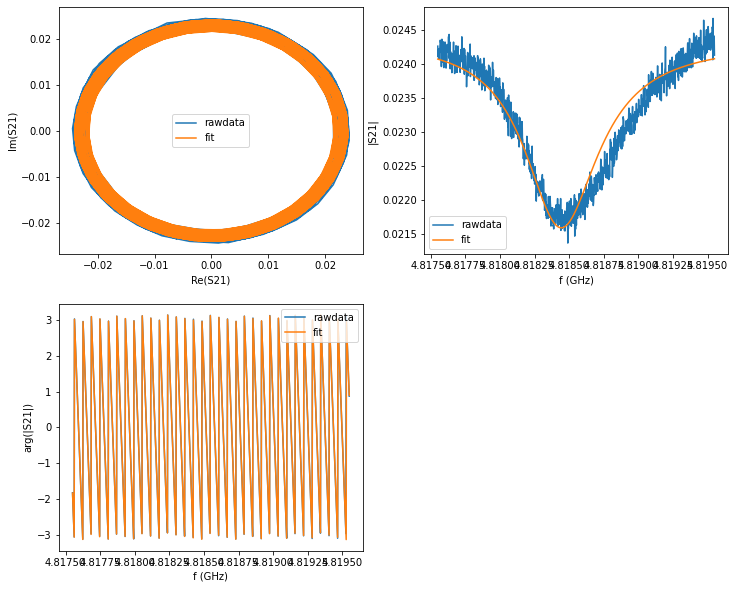

single photon limit: -135.27575041867166 dBm
photons in reso for input -120dBm: 33.695743368249204 photons


In [4]:
port1 = circuit.notch_port(f_data = f, z_data_raw = mag * np.exp(1j*phi))
port1.autofit()

display(pd.DataFrame([port1.fitresults]).applymap(lambda x: "{0:.2e}".format(x)))
port1.plotall()
#plt.rcParams["figure.figsize"] = (12,10)

print("single photon limit:", port1.get_single_photon_limit(diacorr=True), "dBm")
print("photons in reso for input -120dBm:", port1.get_photons_in_resonator(-120,unit='dBm',diacorr=True), "photons")